# College Football Analysis
## By David Weck

In this project, I will be analyzing college football data from 2015-2022. The goal of this project is to derive informative insights, present elegant visualizations, and eventually predict various betting metrics such as winning team, over/under, and the spread.

### Setup and Package Import

In [1]:
import cfbd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('..')
cwd = os.getcwd()
data_path = cwd + "\\Data\\college_football_analysis\\"

### Loading Data and Viewing Data

All of this data was sourced using the cfbd Python API. This API pulls from [collegefootballdata.com](https://collegefootballdata.com/exporter). Details on the API can be found [here](https://github.com/CFBD/cfbd-python). To see how I created the datasets below, please view `data_pull.py` on the [github repo](https://github.com/davidweck96/College-Football-Analysis) for this project.

In [15]:
adv_stats_df = pd.read_csv(data_path + 'adv_stats_df.csv')
betting_df = pd.read_csv(data_path + 'betting_df.csv')
game_results_df = pd.read_csv(data_path + 'game_results_df.csv')
recruiting_df = pd.read_csv(data_path + 'recruiting_df.csv')
returning_production_df = pd.read_csv(data_path + 'returning_production_df.csv')
talent_df = pd.read_csv(data_path + 'talent_df.csv')
teams_df = pd.read_csv(data_path + 'teams.csv')
win_prob_df = pd.read_csv(data_path + 'win_prob_df.csv')

In [26]:
print(adv_stats_df.info())
adv_stats_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13618 entries, 0 to 13617
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   game_id                           13618 non-null  int64  
 1   team                              13618 non-null  object 
 2   opponent                          13618 non-null  object 
 3   week                              13618 non-null  int64  
 4   offense_plays                     13618 non-null  int64  
 5   offense_drives                    13618 non-null  int64  
 6   offense_ppa                       13618 non-null  float64
 7   offense_total_ppa                 13618 non-null  float64
 8   offense_success_rate              13618 non-null  float64
 9   offense_explosiveness             13618 non-null  float64
 10  offense_power_success             13618 non-null  float64
 11  offense_stuff_rate                13618 non-null  float64
 12  offe

,game_id,team,opponent,week,offense_plays,offense_drives,offense_ppa,offense_total_ppa,offense_success_rate,offense_explosiveness,...,defense_success_rate,defense_explosiveness,defense_power_success,defense_stuff_rate,defense_line_yards,defense_line_yards_total,defense_second_level_yards,defense_second_level_yards_total,defense_open_field_yards,defense_open_field_yards_total
13613,401508851,South Dakota State,Montana State,1,50,8,0.598341,29.917065,0.640000,1.244722,...,0.415094,1.352886,0.600000,0.321429,2.082143,58.0,0.500000,14.0,0.000000,0.0
13614,401508870,Colorado Mines,Ferris State,1,53,13,-0.269881,-14.303693,0.339623,1.036877,...,0.500000,1.149530,0.666667,0.195122,2.563415,105.0,1.341463,55.0,1.560976,64.0
13615,401508870,Ferris State,Colorado Mines,1,60,11,0.302802,18.168127,0.500000,1.149530,...,0.339623,1.036877,0.250000,0.571429,0.742857,10.0,0.928571,13.0,0.714286,10.0
13616,401508871,Mount Union,North Central,1,72,10,0.132431,9.535044,0.416667,1.182994,...,0.326531,2.124815,0.400000,0.282051,2.723077,106.0,0.846154,33.0,2.641026,103.0
13617,401508871,North Central,Mount Union,1,49,11,0.305216,14.955562,0.326531,2.124815,...,0.416667,1.182994,0.750000,0.218750,2.018750,65.0,0.812500,26.0,0.343750,11.0


In [27]:
print(betting_df.info())
betting_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6605 entries, 0 to 6604
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           6605 non-null   int64  
 1   season            6605 non-null   int64  
 2   week              6605 non-null   int64  
 3   home_team         6605 non-null   object 
 4   home_score        6605 non-null   int64  
 5   away_team         6605 non-null   object 
 6   away_score        6605 non-null   int64  
 7   provider          6605 non-null   object 
 8   spread            6598 non-null   float64
 9   formatted_spread  6605 non-null   object 
 10  spread_open       1648 non-null   float64
 11  over_under        4895 non-null   float64
 12  over_under_open   1653 non-null   float64
 13  home_moneyline    1389 non-null   float64
 14  away_moneyline    1389 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 774.1+ KB
None


,game_id,season,week,home_team,home_score,away_team,away_score,provider,spread,formatted_spread,spread_open,over_under,over_under_open,home_moneyline,away_moneyline
6600,401403992,2022,3,USC,45,Fresno State,17,Bovada,-12.0,USC -12.0,-13.0,71.5,71.0,-450.0,335.0
6601,401403985,2022,3,Arizona,31,North Dakota State,28,consensus,3.0,North Dakota State -3,NaN,49.0,NaN,NaN,NaN
6602,401403986,2022,3,Arizona State,21,Eastern Michigan,30,Bovada,-20.5,Arizona State -20.5,-19.5,56.5,57.5,-1300.0,725.0
6603,401411116,2022,4,Virginia Tech,10,West Virginia,33,Bovada,2.5,West Virginia -2.5,3.0,50.0,53.0,125.0,-145.0
6604,401426334,2022,4,Georgia State,24,Coastal Carolina,41,Bovada,2.5,Coastal Carolina -2.5,1.5,63.5,64.0,110.0,-130.0


In [28]:
print(game_results_df.info())
game_results_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4820 entries, 0 to 4819
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_id             4820 non-null   int64  
 1   season              4820 non-null   int64  
 2   week                4820 non-null   int64  
 3   conference_game     4820 non-null   bool   
 4   excitement_index    4820 non-null   float64
 5   attendance          4820 non-null   float64
 6   neutral_site        4820 non-null   bool   
 7   away_conference     4820 non-null   object 
 8   away_division       4820 non-null   object 
 9   away_id             4820 non-null   int64  
 10  away_points         4820 non-null   float64
 11  away_post_win_prob  4820 non-null   float64
 12  away_postgame_elo   4820 non-null   float64
 13  away_pregame_elo    4820 non-null   float64
 14  away_team           4820 non-null   object 
 15  home_conference     4820 non-null   object 
 16  home_d

,game_id,season,week,conference_game,excitement_index,attendance,neutral_site,away_conference,away_division,away_id,...,away_pregame_elo,away_team,home_conference,home_division,home_id,home_points,home_post_win_prob,home_postgame_elo,home_pregame_elo,home_team
4815,401282154,2021,14,True,5.661950,78030.0,True,SEC,fbs,61,...,2190.0,Georgia,SEC,fbs,333,41.0,0.994833,2220.0,2173.0,Alabama
4816,401331447,2021,14,True,1.873741,67183.0,True,Big Ten,fbs,130,...,1988.0,Michigan,Big Ten,fbs,2294,3.0,0.064017,1690.0,1767.0,Iowa
4817,401331163,2021,14,True,6.462483,57856.0,True,ACC,fbs,221,...,1742.0,Pittsburgh,ACC,fbs,154,21.0,0.054436,1683.0,1738.0,Wake Forest
4818,401387250,2021,14,True,8.950736,42076.0,False,Pac-12,fbs,30,...,1498.0,USC,Pac-12,fbs,25,24.0,0.592766,1516.0,1499.0,California
4819,401301056,2021,15,False,6.799666,82282.0,False,American Athletic,fbs,2426,...,1330.0,Navy,FBS Independents,fbs,349,13.0,0.004836,1571.0,1596.0,Army


In [19]:
print(recruiting_df.info())
recruiting_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1735 non-null   int64  
 1   recruiting_rank    1735 non-null   int64  
 2   team               1735 non-null   object 
 3   recruiting_points  1735 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 54.3+ KB
None


,year,recruiting_rank,team,recruiting_points
0,2015,1,Alabama,311.10
1,2015,2,USC,310.88
2,2015,3,Florida State,287.06
3,2015,4,Tennessee,286.26
4,2015,5,LSU,284.37


In [20]:
print(returning_production_df.info())
returning_production_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             1018 non-null   int64  
 1   team                             1018 non-null   object 
 2   returning_PPA                    1018 non-null   float64
 3   returning_passing_ppa            1018 non-null   float64
 4   returning_receiving_ppa          1018 non-null   float64
 5   returning_rushing_ppa            1018 non-null   float64
 6   returning_ppa_percent            1018 non-null   float64
 7   returning_passing_ppa_percent    1018 non-null   float64
 8   returning_receiving_ppa_percent  1018 non-null   float64
 9   returning_rushing_ppa_percent    1018 non-null   float64
 10  returning_usage                  1018 non-null   float64
 11  returning_passing_usage          1018 non-null   float64
 12  returning_receiving_

,year,team,returning_PPA,returning_passing_ppa,returning_receiving_ppa,returning_rushing_ppa,returning_ppa_percent,returning_passing_ppa_percent,returning_receiving_ppa_percent,returning_rushing_ppa_percent,returning_usage,returning_passing_usage,returning_receiving_usage,returning_rushing_usage
0,2015,Air Force,225.0,14.2,109.3,101.5,0.634,0.164,0.869,0.714,0.646,0.162,0.950,0.711
1,2015,Akron,97.3,10.6,45.6,41.1,0.562,1.071,0.372,1.005,0.758,0.997,0.432,0.995
2,2015,Alabama,138.1,21.1,78.4,38.6,0.220,0.101,0.285,0.269,0.251,0.134,0.233,0.364
3,2015,Appalachian State,412.1,118.6,156.2,137.3,0.954,0.994,0.909,0.974,0.930,0.863,0.938,0.973
4,2015,Arizona,402.4,133.5,179.9,88.9,0.875,1.000,0.789,0.903,0.861,1.000,0.807,0.756


In [29]:
print(talent_df.info())
talent_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1770 non-null   int64  
 1   school  1770 non-null   object 
 2   talent  1770 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 41.6+ KB
None


,year,school,talent
1765,2022,South Dakota State,5.97
1766,2022,Houston Christian,5.41
1767,2022,Morehead State,4.96
1768,2022,Navy,0.00
1769,2022,Air Force,0.00


In [22]:
print(teams_df.info())
teams_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                131 non-null    int64  
 1   team              131 non-null    object 
 2   mascot            131 non-null    object 
 3   abbreviation      131 non-null    object 
 4   alt_name_1        0 non-null      float64
 5   alt_name_2        0 non-null      float64
 6   alt_name_3        0 non-null      float64
 7   classification    0 non-null      float64
 8   conference        131 non-null    object 
 9   division          80 non-null     object 
 10  color             131 non-null    object 
 11  alt_color         128 non-null    object 
 12  twitter           130 non-null    object 
 13  venue_id          131 non-null    int64  
 14  name              131 non-null    object 
 15  city              131 non-null    object 
 16  state             131 non-null    object 
 1

,id,team,mascot,abbreviation,alt_name_1,alt_name_2,alt_name_3,classification,conference,division,...,timezone,latitude,longitude,elevation,capacity,year_constructed,grass,dome,logo1,logo2
0,2005,Air Force,Falcons,AFA,NaN,NaN,NaN,NaN,Mountain West,Mountain,...,America/Denver,38.996970,-104.843616,2024.875732,46692.0,1962.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/2005...,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...
1,2006,Akron,Zips,AKR,NaN,NaN,NaN,NaN,Mid-American,East,...,America/New_York,41.072553,-81.508341,321.287506,30000.0,2009.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/2006...,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...
2,333,Alabama,Crimson Tide,ALA,NaN,NaN,NaN,NaN,SEC,West,...,America/Chicago,33.208275,-87.550384,70.051361,101821.0,1929.0,True,False,http://a.espncdn.com/i/teamlogos/ncaa/500/333.png,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...
3,2026,Appalachian State,Mountaineers,APP,NaN,NaN,NaN,NaN,Sun Belt,East,...,America/New_York,36.211427,-81.685428,991.341431,30000.0,1962.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/2026...,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...
4,12,Arizona,Wildcats,ARIZ,NaN,NaN,NaN,NaN,Pac-12,NaN,...,America/Phoenix,32.228805,-110.948868,742.153015,50782.0,1928.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/12.png,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...


In [24]:
print(win_prob_df.info())
win_prob_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6377 entries, 0 to 6376
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         6377 non-null   int64  
 1   season_type    6377 non-null   object 
 2   week           6377 non-null   int64  
 3   game_id        6377 non-null   int64  
 4   home_team      6377 non-null   object 
 5   away_team      6377 non-null   object 
 6   spread         6377 non-null   float64
 7   home_win_prob  6377 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 398.7+ KB
None


,season,season_type,week,game_id,home_team,away_team,spread,home_win_prob
6372,2022,regular,11,401422977,East Tennessee State,Western Carolina,-6.0,0.660
6373,2022,regular,11,401403941,Florida,South Carolina,-8.0,0.709
6374,2022,regular,11,401426604,Florida International,Florida Atlantic,15.5,0.143
6375,2022,regular,11,401426372,Georgia State,Louisiana Monroe,-13.5,0.824
6376,2022,regular,11,401411160,Georgia Tech,Miami,-2.0,0.555


### Joining DataFrames

In [11]:
game_stats_df = (game_results_df.merge(adv_stats_df
                                      , how = 'inner'
                                      , on = 'game_id'
                                      , suffixes = ('', '_y'))
                                .merge(teams_df[['team', 'mascot', 'abbreviation', 'color', 'alt_color', 'logo1', 'logo2']]
                                      , how = 'left'
                                      , on = 'team')
                                .merge(returning_production_df
                                      , how = 'left'
                                      , left_on = ['team', 'season']
                                      , right_on = ['team', 'year'])
                                .merge(recruiting_df
                                      , how = 'left'
                                      , left_on = ['team', 'season']
                                      , right_on = ['team', 'year']
                                      , suffixes = ('', '_y'))
                                .merge(talent_df
                                      , how = 'left'
                                      , left_on = ['team', 'season']
                                      , right_on = ['school', 'year']
                                      , suffixes = ('', '_y'))
                                .merge(win_prob_df
                                      , how = 'inner'
                                      , on = 'game_id'
                                      , suffixes = ('', '_y'))      
                                .dropna(axis = 0)                
                                .merge(betting_df
                                      , how = 'inner'
                                      , on = 'game_id'
                                      , suffixes = ('', '_y'))
                )
game_stats_df.drop(game_stats_df.filter(regex='_y$').columns, axis = 1, inplace = True)
game_stats_df.drop(['season_type', 'school', 'year'], axis = 1, inplace = True)

game_stats_df['away_win_prob'] = 1 - game_stats_df['home_win_prob']
game_stats_df['home_team_win'] = np.where(game_stats_df['home_points'] > game_stats_df['away_points'], 1, 0)
game_stats_df['away_team_win'] = 1 - game_stats_df['home_team_win']
game_stats_df['team_win'] = np.where(((game_stats_df['team'] == game_stats_df['home_team']) & (game_stats_df['home_team_win'] == 1)) | ((game_stats_df['team'] == game_stats_df['away_team']) & (game_stats_df['away_team_win'] == 1)), 1, 0)
game_stats_df['total_points'] = game_stats_df['home_points'] + game_stats_df['away_points']
game_stats_df['home_spread_points'] = game_stats_df['away_points'] - game_stats_df['home_points']

In [25]:
print(game_stats_df.info())
game_stats_df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8592 entries, 0 to 8591
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   game_id                           8592 non-null   int64  
 1   season                            8592 non-null   int64  
 2   week                              8592 non-null   int64  
 3   conference_game                   8592 non-null   bool   
 4   excitement_index                  8592 non-null   float64
 5   attendance                        8592 non-null   float64
 6   neutral_site                      8592 non-null   bool   
 7   away_conference                   8592 non-null   object 
 8   away_division                     8592 non-null   object 
 9   away_id                           8592 non-null   int64  
 10  away_points                       8592 non-null   float64
 11  away_post_win_prob                8592 non-null   float64
 12  away_p

,game_id,season,week,conference_game,excitement_index,attendance,neutral_site,away_conference,away_division,away_id,...,over_under,over_under_open,home_moneyline,away_moneyline,away_win_prob,home_team_win,away_team_win,team_win,total_points,home_spread_points
8587,401331163,2021,14,True,6.462483,57856.0,True,ACC,fbs,221,...,73.0,72.0,-160.0,135.0,0.595,0,1,0,66.0,24.0
8588,401387250,2021,14,True,8.950736,42076.0,False,Pac-12,fbs,30,...,57.5,57.5,-195.0,165.0,0.378,1,0,1,38.0,-10.0
8589,401387250,2021,14,True,8.950736,42076.0,False,Pac-12,fbs,30,...,57.5,57.5,-195.0,165.0,0.378,1,0,0,38.0,-10.0
8590,401301056,2021,15,False,6.799666,82282.0,False,American Athletic,fbs,2426,...,35.5,36.0,-300.0,250.0,0.685,0,1,0,30.0,4.0
8591,401301056,2021,15,False,6.799666,82282.0,False,American Athletic,fbs,2426,...,35.5,36.0,-300.0,250.0,0.685,0,1,1,30.0,4.0


### Data Exploration

I will create a few plots to explore the data. I will start with some plots of general college football data over the time frame of my dataset. Then, I will work into some of the more advanced statistics that will be used for predictions.

<AxesSubplot:xlabel='season', ylabel='attendance'>

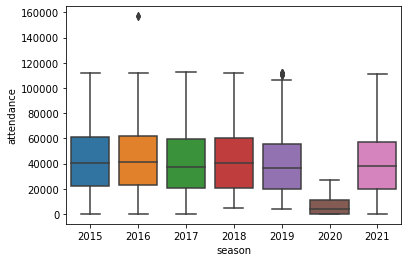

In [14]:
sns.boxplot(data = game_stats_df, x = 'season', y = 'attendance')

In this plot, we can see how attendance was affected in 2020 by the COVID19 pandemic. Attendance appears to have recovered since then.